In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display(image):
    plt.imshow(image[:,:,::-1])

## Performance

In [8]:
# load a color image
img1 = cv2.imread('data/curved_lane.jpg')

# returns the number of clock-cycles after a reference event to the moment this function is called
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
time

1.564734839

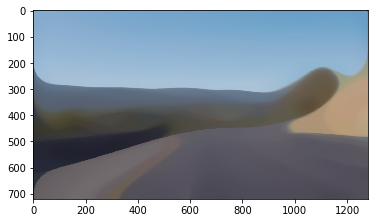

In [9]:
display(img1)

## Default Optimization
SSE2, AVX etc. is enabled by default while compiling. So OpenCV runs the optimized code if it is enabled, else it runs the unoptimized code

In [13]:
# check if optimization is enabled
print("OpenCV {} optimized".format("is" if cv2.useOptimized() else "isn't"))
%timeit res = cv2.medianBlur(img1,49)

OpenCV is optimized
62.5 ms ± 929 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
# Disable optimization
cv2.setUseOptimized(False)
print("OpenCV {} optimized".format("is" if cv2.useOptimized() else "isn't"))
%timeit res = cv2.medianBlur(img1,49)

OpenCV isn't optimized
69.5 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Measuring Performance in IPython
Sometimes you may need to compare the performance of two similar operations

In [15]:
x = 5
z = np.uint8([5])
print("x ** 2")
%timeit y=x**2
print("x * x")
# Python scalar operations are faster than Numpy scalar operations
%timeit y=x*x # Winner!
print("np.array * np.array")
%timeit y=z*z
print("np.square(x)")
%timeit y=np.square(z)

x ** 2
228 ns ± 2.82 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
x * x
47.9 ns ± 0.157 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
np.array * np.array
466 ns ± 0.899 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
np.square(x)
505 ns ± 5.23 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Performance Optimization Techniques

There are several techniques and coding methods to exploit maximum performance of Python and Numpy. The main thing to be noted here is that, first try to implement the algorithm in a simple manner. Once it is working, profile it, find the bottlenecks and optimize them.

1) Avoid using loops in Python as far as possible, especially double/triple loops etc. They are inherently slow.

2) Vectorize the algorithm/code to the maximum possible extent because Numpy and OpenCV are optimized for vector operations.

3) Exploit the cache coherence.

4) Never make copies of array unless it is needed. Try to use views instead. Array copying is a costly operation.

5) Try to use additional libraries like Cython to make your code faster

In [23]:
import operator
def sortby(somelist, n):
    nlist = [(x[n], x) for x in somelist]
    nlist.sort()
    return [val for (key, val) in nlist]

def sortby_inplace(somelist, n):
    somelist[:] = [(x[n], x) for x in somelist]
    somelist.sort()
    somelist[:] = [val for (key, val) in somelist]
    return

somelist = [(1, 2, 'def'), (2, -4, 'ghi'), (3, 6, 'abc')]
%timeit somelist.sort(key=operator.itemgetter(2))
%timeit sortby(somelist, 2)
%timeit sortby_inplace(somelist, 2)

428 ns ± 4.27 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
891 ns ± 2.62 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.03 µs ± 1.96 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
